In [1]:
# Import Python Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import tree, datasets
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [2]:
# Load boston dataset
boston = datasets.load_boston() 
features = pd.DataFrame(boston.data, columns=boston.feature_names) 
targets = boston.target 

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# DataFrame using boston dataset features and target values
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = boston.target

In [7]:
# Statistical analysis of features in DataFrame df_x
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
# Data Preprocessing
# Function to handle missing data
def data_preprocessing(df):
    df.convert_objects(convert_numeric=True)
    df.fillna(0, inplace=True) 
    
    return df

In [9]:
# Function to handle categorical data
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            
            x = 0            
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1                    
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

In [10]:
# Perform data preprocessing on boston dataset
df_x = data_preprocessing(df_x)
df_x = handle_non_numeric_data(df_x)
df_x.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
# Spliting boston dataset into test and traning dataset
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=5)

In [12]:
# Apply RandomForest Model on boston dataset

rfc1 = RandomForestRegressor(random_state=10)
rfc1.fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [13]:
#Applying model by changing the max_features parameter
rfc2 = RandomForestRegressor(max_features=8, random_state=10)
rfc2.fit(x_train, y_train)

rfc3 = RandomForestRegressor(max_features=6, random_state=10)
rfc3.fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=10,
           verbose=0, warm_start=False)

In [14]:
# Feature engineering
# Analyze features importance
rfc1.feature_importances_

array([0.05492055, 0.00108665, 0.00574825, 0.00511993, 0.00889295,
       0.34557121, 0.01192751, 0.08394476, 0.00816924, 0.01751805,
       0.00749098, 0.01011708, 0.43949285])

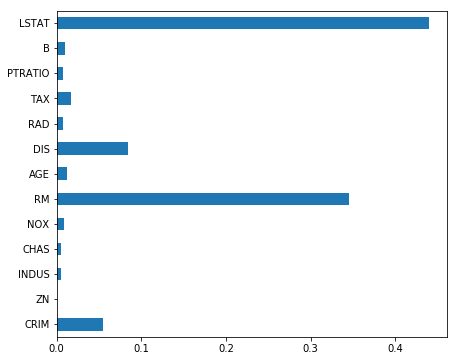

In [15]:
%matplotlib inline
feature_importances = pd.Series(rfc1.feature_importances_,index=df_x.columns)
feature_importances.plot(kind='barh',figsize=(7,6))

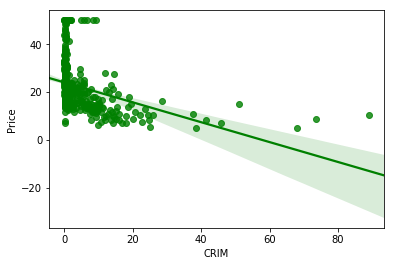

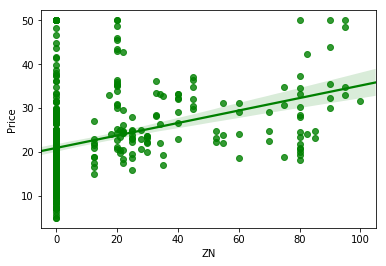

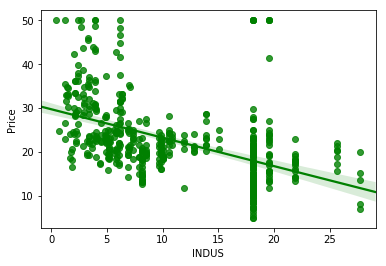

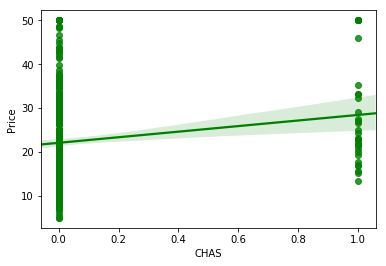

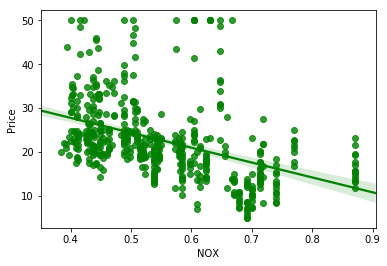

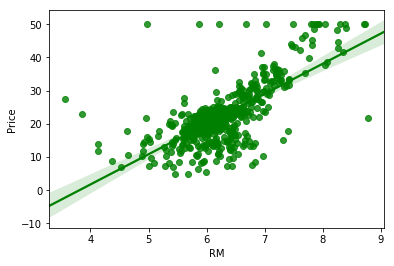

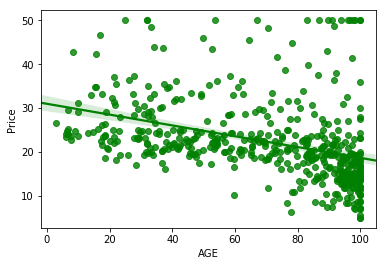

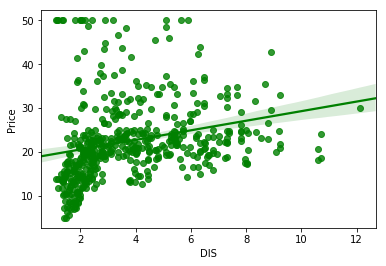

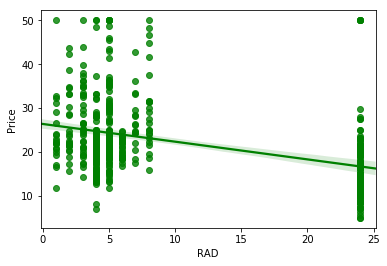

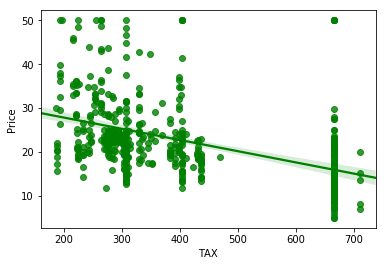

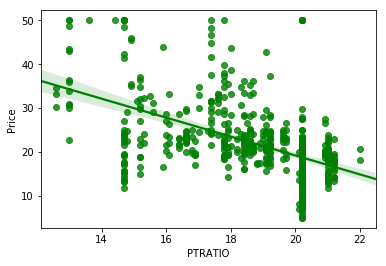

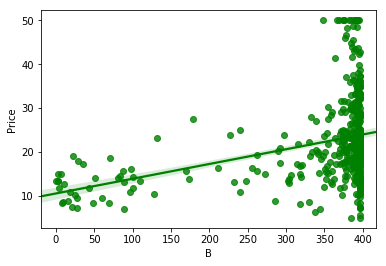

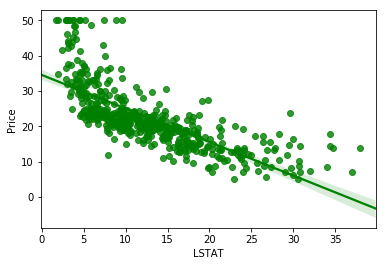

In [16]:
#Graph between features and target price
for var in boston.feature_names:
    sns.regplot(features[var], targets, color='g')
    plt.ylabel('Price')
    plt.show()

In [17]:
# Model Evaluation
# Model efficiency by considering all the parameters of boston dataset for analysis
pred1 = rfc1.predict(x_test)
# The mean squared error
print("Mean squared error: %f" % mean_squared_error(y_test, pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %f' % r2_score(y_test, pred1))

print("coefficient of determination R^2 of the prediction.:",pred1)


Mean squared error: 14.593798
Variance score: 0.813602
coefficient of determination R^2 of the prediction.: [47.62 29.03 22.41 12.24 40.86  6.93 26.65 27.12 24.94 19.37 33.64 19.96
 20.47 33.65 24.91 18.09 11.73 18.62 19.12 34.03 15.8  18.81 46.32 21.83
 28.86  9.22 24.11 20.24 23.75 27.1  15.82 15.1  11.44 17.12 23.65 20.08
 26.39  8.71 46.14 33.86 18.39 15.2  24.72 16.11 23.6  30.34  8.4  17.77
 19.05 16.46 19.75 20.65 22.75 14.65 16.56 23.04 42.99 15.   25.8  19.87
 19.93 22.22 16.6  29.99 21.34  9.98 19.58 25.03 22.32 20.77 15.95 23.84
 18.99 14.39 34.82 29.05 19.41 15.21 33.53 16.04 20.94 49.17 19.07 16.88
 21.71 14.82 19.67  9.23 20.45 20.92 41.74 18.44 19.44 16.03 23.46 25.77
 14.4  28.84 22.21 16.89 19.64 23.83]


In [18]:
# Model efficiency by considering n most important features (n=8) of boston dataset for analysis
pred2 = rfc2.predict(x_test)
# The mean squared error
print("Mean squared error: %f" % mean_squared_error(y_test, pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %f' % r2_score(y_test, pred2))
print("coefficient of determination R^2 of the prediction.:",pred2)


Mean squared error: 12.124686
Variance score: 0.845139
coefficient of determination R^2 of the prediction.: [46.39 27.97 21.41 10.73 39.14  8.38 26.01 27.36 24.91 20.2  31.86 19.54
 20.58 32.51 24.78 19.2  12.46 20.39 21.09 31.52 14.17 19.77 45.73 20.51
 30.18 11.13 23.82 19.07 22.96 28.49 16.04 15.14 12.45 21.03 24.47 19.58
 27.28 10.45 42.55 32.72 14.95 14.78 26.65 14.96 24.65 26.73  8.69 17.93
 21.32 15.79 19.62 20.58 23.64 15.32 16.99 23.97 42.65 15.46 25.95 20.68
 20.72 23.62 14.75 32.42 21.14  9.04 19.11 23.37 22.78 20.6  15.95 25.52
 18.79 15.56 32.1  30.15 20.47 15.84 31.34 15.96 20.9  46.11 21.78 16.4
 21.08 15.12 20.68  9.17 20.31 23.36 41.03 18.52 22.51 14.25 22.86 27.08
 16.04 25.63 22.98 17.23 21.07 23.88]


In [19]:
# Model efficiency by considering n most important features (n=6) of boston dataset for analysis
pred3 = rfc3.predict(x_test)
# The mean squared error
print("Mean squared error: %f" % mean_squared_error(y_test, pred3))
# Explained variance score: 1 is perfect prediction
print('Variance score: %f' % r2_score(y_test, pred3))
print("coefficient of determination R^2 of the prediction.:",pred3)


Mean squared error: 10.278523
Variance score: 0.868719
coefficient of determination R^2 of the prediction.: [44.89 27.69 22.58 11.86 36.77  8.39 27.52 26.01 22.94 18.97 33.18 19.38
 19.86 34.   25.17 18.7  12.38 18.86 19.08 28.43 15.09 19.27 46.44 19.93
 28.52 10.38 23.75 20.13 22.15 25.65 15.64 15.07 11.36 18.36 23.29 20.08
 25.    8.83 45.25 33.8  16.15 14.93 24.97 16.23 24.38 27.53  8.79 18.55
 20.46 15.95 20.45 21.45 23.16 14.53 16.47 22.7  41.4  14.97 25.35 20.4
 19.79 22.98 16.23 38.2  21.86  9.26 19.54 23.78 22.95 20.63 16.56 23.93
 18.68 14.1  22.6  31.57 21.79 16.38 32.75 17.67 20.19 49.   21.08 16.53
 20.24 14.   19.89 10.5  19.87 22.   41.67 18.15 18.48 15.74 24.3  26.16
 16.56 25.   21.28 16.8  20.99 23.72]


In [20]:
# Data Normalization and model evaluation
from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler().fit(x_train)
scalery = StandardScaler().fit(y_train.reshape(-1, 1))

x_train1 = scalerx.transform(x_train)
y_train1 = scalery.transform(y_train.reshape(-1, 1))
x_test1 = scalerx.transform(x_test)
y_test1 = scalery.transform(y_test.reshape(-1, 1))

#print (np.max(x_train1), np.min(x_train1), np.mean(x_train1), np.max(y_train1), np.min(y_train1), np.mean(y_train1))

# Best Model accuracy was provided when we were using 6 features, 
# So Normalized data is given as input into RandomForestRegressor with  max_features=6
rfc4 = RandomForestRegressor(max_features=6, random_state=10)
rfc4.fit(x_train1, y_train1)
pred4 = rfc4.predict(x_test1)
# The mean squared error
print("Mean squared error after normalizing data with 6 features: %f" % mean_squared_error(y_test1, pred4))
# Explained variance score: 1 is perfect prediction
print('Variance score after normalizing data with 6 features: %f' % r2_score(y_test1, pred4))
print("coefficient of determination R^2 of the prediction.:",pred4)


Mean squared error after normalizing data with 6 features: 0.109291
Variance score after normalizing data with 6 features: 0.880089
coefficient of determination R^2 of the prediction.: [ 2.25426236  0.62505608 -0.07302104 -1.35912295  1.50979061 -1.47564896
  0.34129366  0.27116227 -0.12481038 -0.29204679  1.2745807  -0.3697308
 -0.23809956  1.08900224  0.14492576 -0.40533597 -1.01601858 -0.3287309
 -0.31362568  0.29166221 -0.85633479 -0.37296763  2.26181497 -0.24996795
  0.87645016 -1.30193889  0.10932058 -0.22623117 -0.00828437  0.18916248
 -0.60062493 -0.8056244  -1.07320265 -0.39778335  0.07155753 -0.4279938
  0.28303066 -1.49075419  2.31792008  1.0566339  -0.76678239 -0.85094007
  0.21721504 -0.61249332  0.19671509  0.60239825 -1.50262258 -0.37836235
 -0.25644162 -0.88438735 -0.25644162 -0.13559983  0.11363636 -0.86928212
 -0.57149343  0.01005769  1.96402627 -0.7257825   0.25605704 -0.26831001
 -0.38699391 -0.00936332 -0.72146672  1.52705373 -0.21867856 -1.45730691
 -0.40102019  0

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


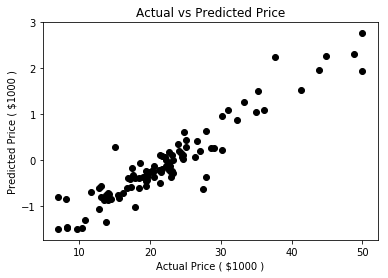

In [21]:
# Visulization between predicted and actual price

#Between y_test (actual price) and predicted price (pred4)
plt.xlabel("Actual Price ( $1000 )")
plt.ylabel("Predicted Price ( $1000 )")
plt.title("Actual vs Predicted Price")
plt.scatter(y_test, pred4, color='black')
plt.show()